<a href="https://colab.research.google.com/github/Alok943/Customer-Churn-Prediction/blob/main/customerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# This is the line that was fixed:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-1435926736.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Size of the dataset
df.shape

(7043, 21)

In [6]:
#Check for null values
df.isnull().sum().sum()

np.int64(0)

Data Inspection

    Perform a preliminary check of the dataset to understand its structure, size, and data types (.head(), .info(), .describe()).

Data Cleaning

    This is a critical step to ensure data quality and involves several sub-tasks.

Handling Missing Values

    Identify missing data (.isnull().sum()) and decide on a strategy: remove, replace (impute) with mean/median/mode, or use an advanced imputation method.

Handling Duplicates

    Find and remove any duplicate records to prevent skewed results.

Correcting Structural Errors

    Fix issues like incorrect data types (e.g., dates stored as text), inconsistent capitalization, and typos.

Outlier Detection and Treatment

    Identify extreme values that can skew analysis and decide whether to remove, transform, or keep them based on domain knowledge.

Exploratory Data Analysis (EDA)

    Analyze variables individually (univariate analysis) and then explore relationships between them (bivariate/multivariate analysis) using statistics and visualizations.

Feature Engineering

    Create new, more informative features from the existing data to improve model performance. This can include combining columns or extracting information (e.g., day of the week from a date).

Data Visualization 📊

    Create charts and plots (histograms, scatter plots, box plots, heatmaps) to uncover patterns, trends, and communicate findings effectively.

Drawing Conclusions & Reporting

    Summarize your insights, answer the initial question, and present your findings to stakeholders in a clear, concise report or presentation.



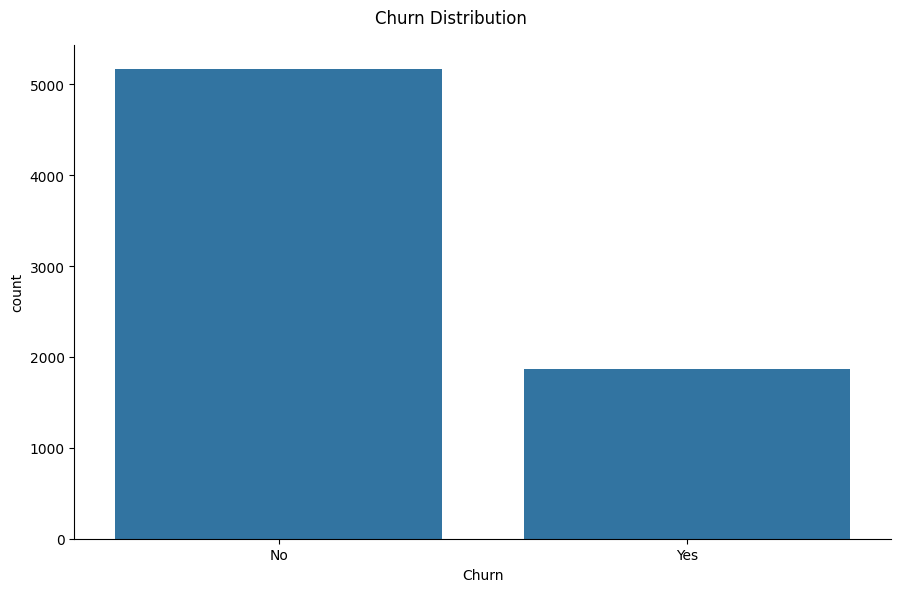

In [7]:
sns.catplot(
    data=df,
    x='Churn',
    kind='count',
    height=6,
    aspect=1.5
)

# For catplot, use plt.suptitle to add a title to the entire figure
plt.suptitle('Churn Distribution')

# Adjust layout to make sure the title fits
plt.tight_layout()

plt.show()

In [11]:
df.head(13)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


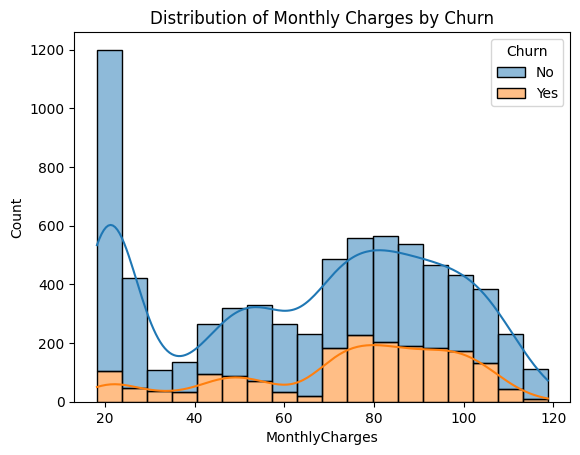

In [9]:
# Example for 'MonthlyCharges'
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.show()

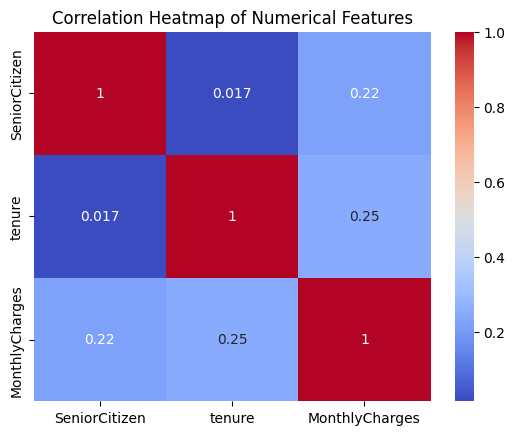

In [12]:
# Use correlation heatmap to show how each numerical features are related to each others.
# Select only numerical columns for the heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [13]:
# drop the target variable and any identifiers
X = df.drop(['customerID', 'Churn'], axis=1)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [15]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


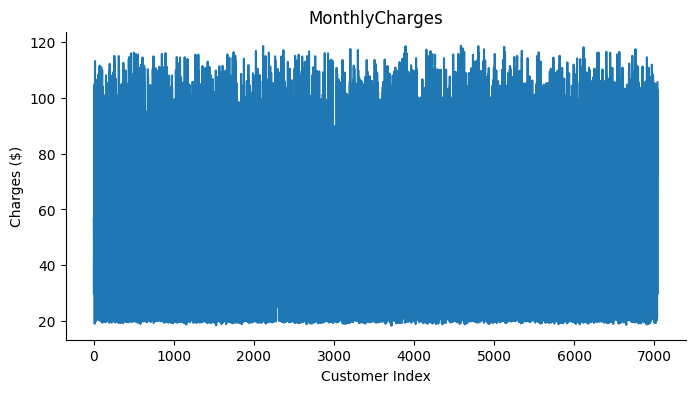

In [18]:
# @title MonthlyCharges

from matplotlib import pyplot as plt
X['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.xlabel("Customer Index")  # Sets the x-axis label
plt.ylabel("Charges ($)")
plt.gca().spines[['top', 'right']].set_visible(False)

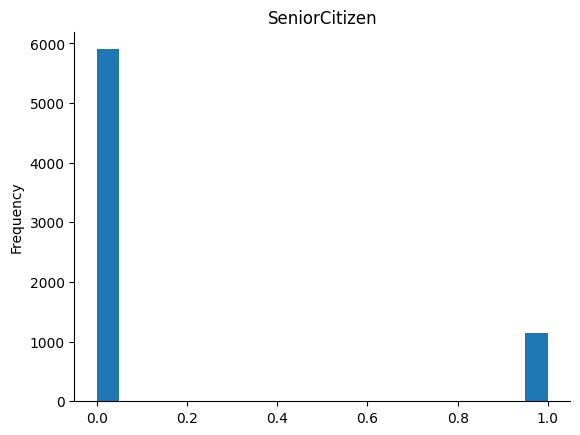

In [16]:
# @title SeniorCitizen

from matplotlib import pyplot as plt
X['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
#Encode the non numerical data types with scikit learn's
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [20]:
# Split training and testing data
from sklearn.model_selection import train_test_split

# Your target variable
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split data using the features dataframe X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Only transform the test data
X_test_processed = preprocessor.transform(X_test)

Now start Training the model


In [33]:
from sklearn.linear_model import LogisticRegression

# 1. Create an instance of the model
log_reg_model = LogisticRegression(max_iter=1000,class_weight='balanced')

# 2. Train the model on your processed training data
log_reg_model.fit(X_train_processed, y_train)

print("Model training complete!")

Model training complete!


In [34]:
# Use the trained model to make predictions
y_pred = log_reg_model.predict(X_test_processed)

In [35]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



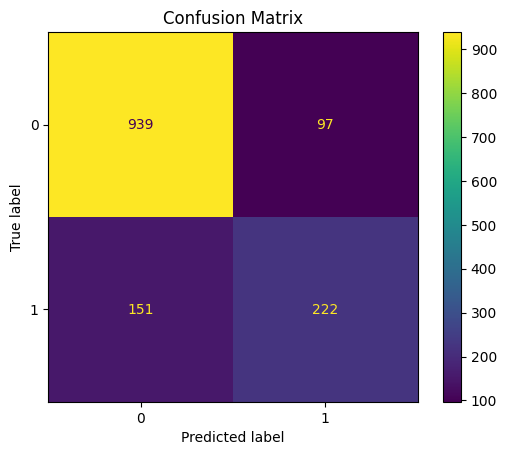

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_processed, y_test)
plt.title('Confusion Matrix')
plt.show()

In [31]:
#now use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_processed, y_train)

# Now, evaluate this new model

RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
# Get the probabilities for the positive class (Churn)
y_pred_probs = log_reg_model.predict_proba(X_test_processed)[:, 1]

# Set a new threshold
new_threshold = 0.4
y_pred_new_threshold = (y_pred_probs >= new_threshold).astype(int)

# Now evaluate using this new prediction
print(classification_report(y_test, y_pred_new_threshold))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



In [36]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the original training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Train a new model on the resampled data
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the new model

LogisticRegression(max_iter=1000)

Classification Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1036
           1       0.56      0.76      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

Confusion Matrix (after SMOTE):


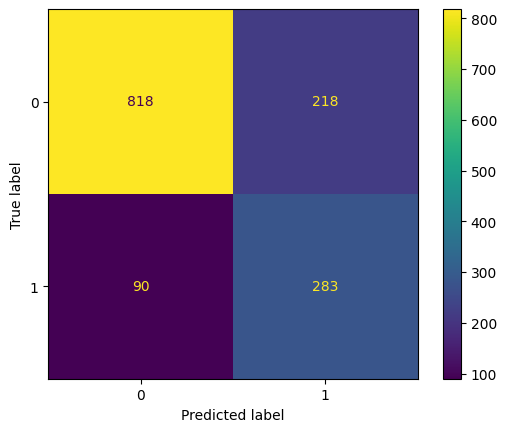

In [37]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions on the original test set
y_pred_smote = log_reg_smote.predict(X_test_processed)

# 2. Print the classification report to see the new scores
print("Classification Report (after SMOTE):")
print(classification_report(y_test, y_pred_smote))

# 3. Display the confusion matrix
print("Confusion Matrix (after SMOTE):")
ConfusionMatrixDisplay.from_estimator(log_reg_smote, X_test_processed, y_test)
plt.show()

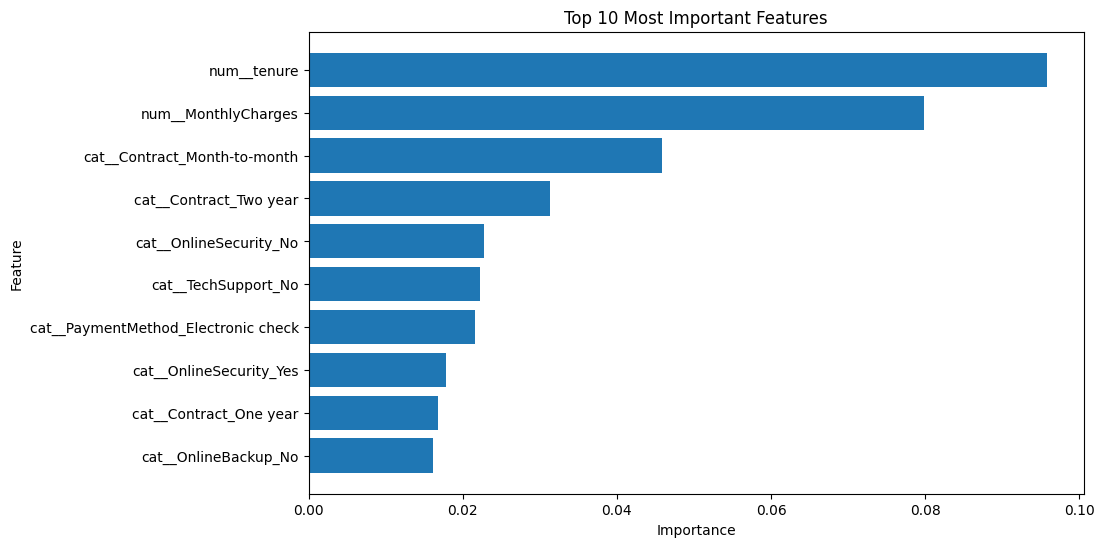

In [39]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Get feature names from the preprocessor after fitting
# This will include the one-hot encoded feature names
feature_names = preprocessor.get_feature_names_out()


# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'].head(10), feature_importance_df['importance'].head(10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],         # Number of trees in the forest
    'max_depth': [10, 20, None],        # Maximum depth of the trees
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at a leaf node
}

# 2. Create the GridSearchCV object
# We will optimize for the F1-score, a good balance between precision and recall.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# NOTE: 'cv=3' means 3-fold cross-validation.
# 'n_jobs=-1' uses all available CPU cores to speed up the process.

In [41]:
# 3. Fit the grid search to the data
# Use the resampled data if it gave you better results, otherwise use the original processed data
grid_search.fit(X_train_processed, y_train)

# 4. Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# 5. Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_processed)

# 6. Print the classification report for the best model
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.53      0.80      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



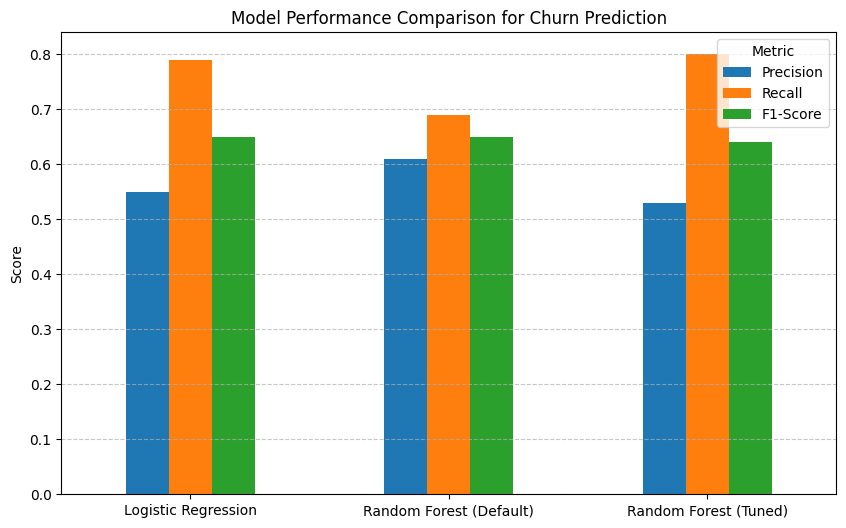

In [42]:
# Create a dictionary with your model results
model_scores = {
    'Logistic Regression': {'Precision': 0.55, 'Recall': 0.79, 'F1-Score': 0.65},
    'Random Forest (Default)': {'Precision': 0.61, 'Recall': 0.69, 'F1-Score': 0.65},
    'Random Forest (Tuned)': {'Precision': 0.53, 'Recall': 0.80, 'F1-Score': 0.64}
}

# Convert the dictionary to a DataFrame
df_scores = pd.DataFrame(model_scores).T # .T transposes the DataFrame

# Plot the DataFrame
df_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison for Churn Prediction')
plt.ylabel('Score')
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()